In [1]:
from __future__ import division
import time

import pandas as pd
import numpy as np

#from sklearn import cross_validation
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_selection import SelectPercentile, f_classif
#from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
%matplotlib inline

# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

color_list = [COLOR1, COLOR2, COLOR3, COLOR4, COLOR5]

In [2]:
# Import all dataframes and build the train dataframe
start_time = time.time()
df = pd.DataFrame.from_csv('df.csv', index_col=None, encoding="ISO-8859-1")
print("--- Files Loaded: %s minutes ---" % round(((time.time() - start_time)/60),2))

--- Files Loaded: 0.1 minutes ---


In [21]:
# Drop the text features that are not needed to build the ML model
df_temp = df[['id','product_uid','relevance','query_last_word_in_title','len_of_query','word_in_title','leveneditdist_query_in_title','leveneditdist_query_in_product_description','len_of_title','len_of_description','len_of_brand','query_in_title','query_in_description','query_last_word_in_description','word_in_description']]

# Separate out the original test rows and the original train rows
df_train_final = df_temp.iloc[num_train:]
df_train_final = df_temp.iloc[:num_train]

# Set the original length of the train dataset to seperate train/test
num_train = 74067

## Manual Split of train data for later validation

In [25]:
# Randomize the train_final dataframe before selecting train/test datasets from it
np.random.seed(0)
df_train_final_temp = df_train_final.iloc[np.random.permutation(len(df_train_final))]
df_train_final_temp = df_train_final_temp.reset_index(drop=True)

# Define the amount of data in the train and test dataset
num_train_final = int(num_train * 0.95 // 1)

# Define the train and test features
df_features_test = df_train_final_temp.iloc[num_train_final:]
df_features_train = df_train_final_temp.iloc[:num_train_final]

features_test = df_features_test.drop(['product_uid','id','relevance'],axis=1).values
features_train = df_features_train.drop(['product_uid','id','relevance'],axis=1).values

# Define the train and test labels
labels_test = df_train_final_temp.relevance.iloc[num_train_final:].values
labels_train = df_train_final_temp.relevance.iloc[:num_train_final].values


# Define the train and test labels as an integer for the Naive-Bayes model
#df_train_final_temp['relevance_int'] = df_train_final_temp['relevance'].map(lambda x: int(x*100))
#labels_test_nb = df_train_final_temp.relevance_int.iloc[num_train_final:].values
#labels_train_nb = df_train_final_temp.relevance_int.iloc[:num_train_final].values

## Random Forest Regression

In [58]:
# Create the RandomForestRegressor and the BaggingRegressor
clf = RandomForestRegressor(n_estimators=50, max_depth=15, max_features='auto', criterion="mse", random_state=0)
#clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=0)

# Fit the data
start_time = time.time()
clf.fit(features_train, labels_train)
print("--- RF Train: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Check the regressions's coefficient of determination on a a test dataset
start_time = time.time()
accuracy = clf.score(features_test, labels_test)
print("--- RF COD: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Check the regressions's Mean Squared Error on  a test dataset
start_time = time.time()
pred_test = clf.predict(features_test)
mse = mean_squared_error(labels_test, pred_test) 
print("--- RF MSE: %s minutes ---" % round(((time.time() - start_time)/60), 2))


print "Random Forest Regression Coefficient of Determination (r^2) =", np.round(accuracy, 4)
print "Random Forest Regression Mean Square Error =", np.round(mse, 4)

--- RF Train: 0.17 minutes ---
--- RF COD: 0.0 minutes ---
--- RF MSE: 0.0 minutes ---
Random Forest Regression Coefficient of Determination (r^2) = 0.1906
Random Forest Regression Mean Square Error = 0.2333


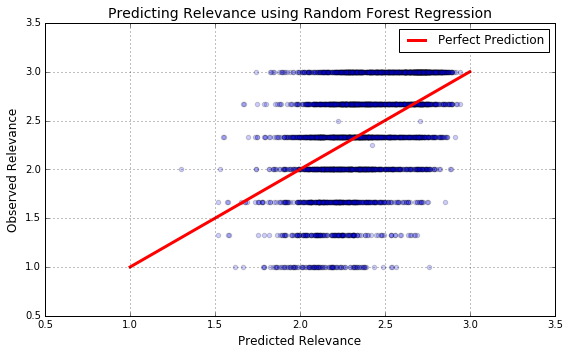

In [57]:
x1 = pred_test
y1 = labels_test

x = [1,2,3]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1, alpha=0.2)
plt.plot(x, x, 'r-', color='Red', linewidth=3.0, label='Perfect Prediction')
plt.legend()

ax.set_xlim([0.5, 3.5])
ax.set_xlabel('Predicted Relevance', fontsize=12)
ax.set_ylabel('Observed Relevance', fontsize=12)
ax.set_title('Predicting Relevance using Random Forest Regression', fontsize=14)

ax.grid(True)
fig.tight_layout()

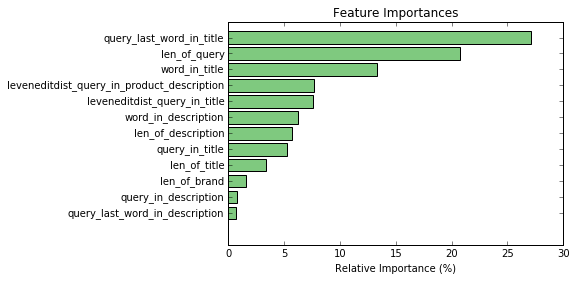

In [59]:
# Plot RandomForestRegression feature importance
features = df_features_train.columns[3:]
importances = clf.feature_importances_ * 100
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color=COLOR1, align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance (%)');

## Not Used

In [11]:
#df_train_final['relevance_transformed'] = df_train_final['relevance'].map(lambda x: np.log(x))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
#df_tfr = df_train_final.relevance
#df_tfrt = df_train_final.relevance_transformed

#df_tfr = df_tfr.value_counts().sort_values().tail(7)
#df_tfrt = df_tfrt.value_counts().sort_values().tail(7)

#df_tfr = df_tfr.sort_index()
#df_tfrt = df_tfrt.sort_index()

In [6]:
# Export final train/test datasets as a .csv
#df_train_final_stats = df[['id','product_uid', 'product_title', 'search_term','relevance','leveneditdist_query_in_title','leveneditdist_query_in_product_description','len_of_query','len_of_title', 'len_of_description','len_of_brand','query_in_title','query_in_description','query_last_word_in_title','query_last_word_in_description', 'word_in_title','word_in_description',]]
#df_train_final_stats = df_train_final_stats.iloc[:num_train]
#df_train_final_stats.to_csv('df_train_final_stats.csv')

## Naive-Bayes Classification -- Not Used

In [11]:
# Instantiate the GuassianNB class or create a classifier
#clf = GaussianNB()

# Do the training or build a model/fit Gaussian Naive Bayes according to train data
#start_time = time.time()
#clf = clf.fit(features_train, labels_train_nb)
#print("--- NB Train: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Make predictions based on the model created above
# start_time = time.time()
# pred = clf.predict(features_test)
# print("--- NB Predict: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Check the model's accuracy on a different test dataset
#accuracy = clf.score(features_test, labels_test_nb)

#print "NB Score =", accuracy * 100, '%'

--- NB Train: 0.0 minutes ---
--- RF MSE: 0.0 minutes ---
NB Score = 19.5153233428 %
NB Mean Square Error = 437326.18 %


## SVM Classification  -- Not Used

In [12]:
# Does not complete currently

# Instantiate the SVC class or create a classifier
#clf = SVC(kernel='linear')

# Do the training or build a model/fit SVM according to train data
#start_time = time.time()
#clf = clf.fit(features_train, labels_train_nb)
#print("--- SVM Train: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Make predictions based on the model created above
#start_time = time.time()
#pred = clf.predict(features_test)
#print("--- SVM Predict: %s minutes ---" % round(((time.time() - start_time)/60), 2))

# Check the model's accuracy on a different test dataset
#accuracy = clf.score(features_test, labels_test_nb)

#print "accuracy =", accuracy * 100, '%'